In [1]:
import pandas as pd
from scipy import *
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('Datos cortados eeg.csv',header=None)

In [3]:
x = data[1]

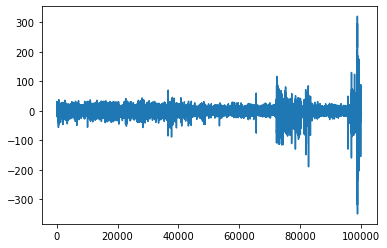

In [4]:
plt.plot(x)

In [5]:
data[1].shape

(100200,)

<ipython-input-6-69dd57bd4879>:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  yf = fft(x)


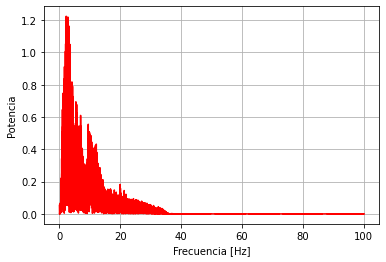

In [6]:
N = len(x)
T = 1.0/200.0
yf = fft(x)
xf = fft.fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),c='red')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
#plt.xlim((0,40))
plt.grid()
plt.show()

In [7]:
open_dat = pd.read_csv('open-closedat.csv')

In [8]:
open_dat

,Dev1/ai0,Dev1/ai1
0,0.019046,-0.031169
1,0.025413,-0.030533
2,0.038146,-0.024803
3,0.034963,-0.026713
4,0.029233,-0.031806
...,...,...
88345,-0.001326,-0.027350
88346,-0.001963,-0.024803
88347,-0.007693,-0.018438
88348,0.001220,-0.017165


In [9]:
S1 = open_dat['Dev1/ai0'].to_numpy()
S2 = open_dat['Dev1/ai1'].to_numpy()

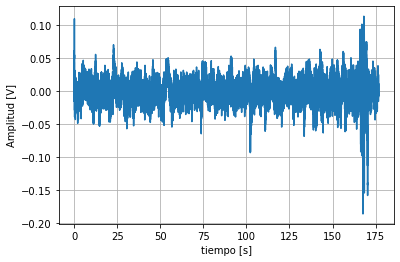

In [10]:
frecm=500
tiempo_reg = len(S1)/frecm
time = np.linspace(0,tiempo_reg,len(S1))
plt.plot(time,S1)
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()

(-105.790436, 141.230558)

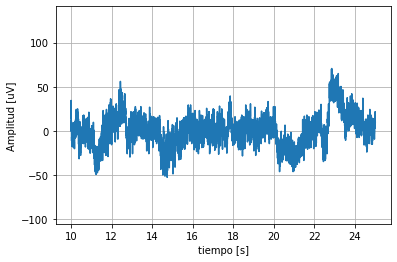

In [11]:
t_start = 10 #Tiempo de inicio del graficador
tint = 15 #Intervalo de tiempo a visualizar
time_cut = time[(t_start)*frecm:(t_start+tint)*frecm] #Vector de tiempo 
S1_cut = S1[t_start*frecm:(t_start+tint)*frecm]*1000 #Señal en el intervalo de tiempo en uV
S1_max =S1_cut.max() #Cotas max - min
S1_min =S1_cut.min()
plt.plot(time_cut,S1_cut,'-')
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud [uV]')
plt.grid()
plt.ylim(2*S1_min,2*S1_max)

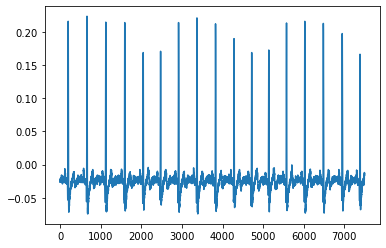

In [12]:
plt.plot(S2[t_start*frecm:(t_start+tint)*frecm])

<ipython-input-13-387b210cb85d>:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  yf2 = fft(x2)


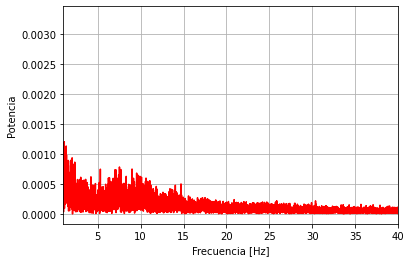

In [13]:
x2 = S1
N2 = len(x2)
T2 = 1.0/frecm
yf2 = fft(x2)
xf2 = fft.fftfreq(N2, T2)[:N2//2]
import matplotlib.pyplot as plt
plt.plot(xf2, 2.0/N2 * np.abs(yf2[0:N2//2]),c='red')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.xlim((1,40))
plt.grid()
plt.show()

(-105.790436, 141.230558)

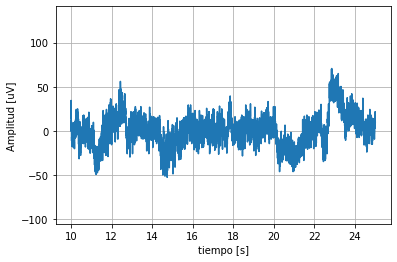

In [14]:
t_start = 10 #Tiempo de inicio del graficador
tint = 15 #Intervalo de tiempo a visualizar
#time_cut = time[(t_start)*frecm:(t_start+tint)*frecm] #Vector de tiempo 
time_cut = np.linspace(t_start,t_start+tint,tint*frecm)
S1_cut = S1[t_start*frecm:(t_start+tint)*frecm]*1000 #Señal en el intervalo de tiempo en uV
S1_max =S1_cut.max() #Cotas max - min
S1_min =S1_cut.min()
plt.plot(time_cut,S1_cut,'-')
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud [uV]')
plt.grid()
plt.ylim(2*S1_min,2*S1_max)

In [15]:
def record_ani_setup(S,t_start,t_int):
    frecm=500
    tiempo_reg = len(S)/frecm
    t_fin = t_start + t_int
    time = np.linspace(0,tiempo_reg,len(S))
    time_cut = np.linspace(t_start, t_fin, t_int*frecm)
    S_cut = S[t_start*frecm:(t_fin)*frecm]*1000
    S_max,S_min =S_cut.max(),S_cut.min()
    title = f'Registro EEG t[{t_start},{t_fin}]'
    x = time_cut
    y = S_cut
    register = pd.DataFrame(y,x)
    register.columns = {title}
    
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
    
    fig = plt.figure(figsize=(10,6))
    plt.xlim(t_start-1, t_fin+1)
    plt.ylim(2*S_min,2*S_max)
    plt.xlabel('Tiempo [s]',fontsize=20)
    plt.ylabel('Voltaje[uV]',fontsize=20)
    plt.title(title,fontsize=20)
    return fig,register,writer,y


In [21]:
%matplotlib notebook
S = S1
t_start = 160
t_int = 5
frecm=500
tiempo_reg = len(S)/frecm
t_fin = t_start + t_int
time = np.linspace(0,tiempo_reg,len(S))
time_cut = np.linspace(t_start, t_fin, t_int*frecm)
S_cut = S[t_start*frecm:(t_fin)*frecm]*1000
S_max,S_min =S_cut.max(),S_cut.min()
title = f'Registro EEG t=[{t_start},{t_fin}]'
x = time_cut
y = S_cut
register = pd.DataFrame(y,x)
register.columns = {title}
    
Writer = animation.writers['ffmpeg']
writer = Writer(fps=frecm, metadata=dict(artist='Me'), bitrate=1800)
    
fig = plt.figure(figsize=(8,4))
plt.xlim(t_start, t_fin)
plt.ylim(2*S_min,2*S_max)
plt.xlabel('Tiempo [s]',fontsize=20)
plt.ylabel('Voltaje[uV]',fontsize=20)
plt.title(title,fontsize=20)
plt.grid()

def animate(i):
    #fig,register,writer = record_ani_setup(S,t_start,t_tint)
    data = register.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title],data=data, color="b")
    p.tick_params(labelsize=10)
    plt.setp(p.lines,linewidth=0.5)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(S_cut), repeat=True)
plt.show()
ani.save(f'EEG_regt[{t_start},{t_fin}].mp4', writer=writer)

<IPython.core.display.Javascript object>

In [17]:
def Energy(S,S_f):
    E_t =0
    E_f = 0
    
    for i in range(len(S_f)):
        E_f = abs(S_f[i])**2 +E_f
    for i in range(len(S)):
        E_t = abs(S[i])**2 + E_t
        
    E_f = E_f/N
    if E_t//E_f == 0:
        return f"Se cumple el Teorema de Perceval, se conserva la energía E = {E_t}"
    return E_t,E_f

In [18]:
Energy(data[1],yf)

'Se cumple el Teorema de Perceval, se conserva la energía E = 29493201.71200183'